In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [17]:
series = pd.read_csv("Series/international-airline-passengers.csv")['Count']

In [18]:
series.head()

0    112
1    118
2    132
3    129
4    121
Name: Count, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


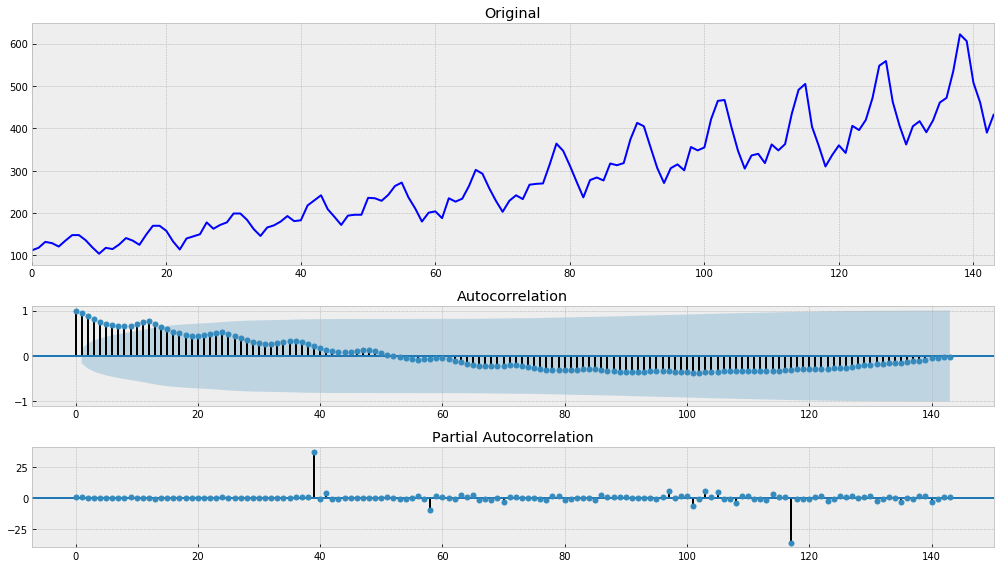

In [19]:
tsplot(series)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [20]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


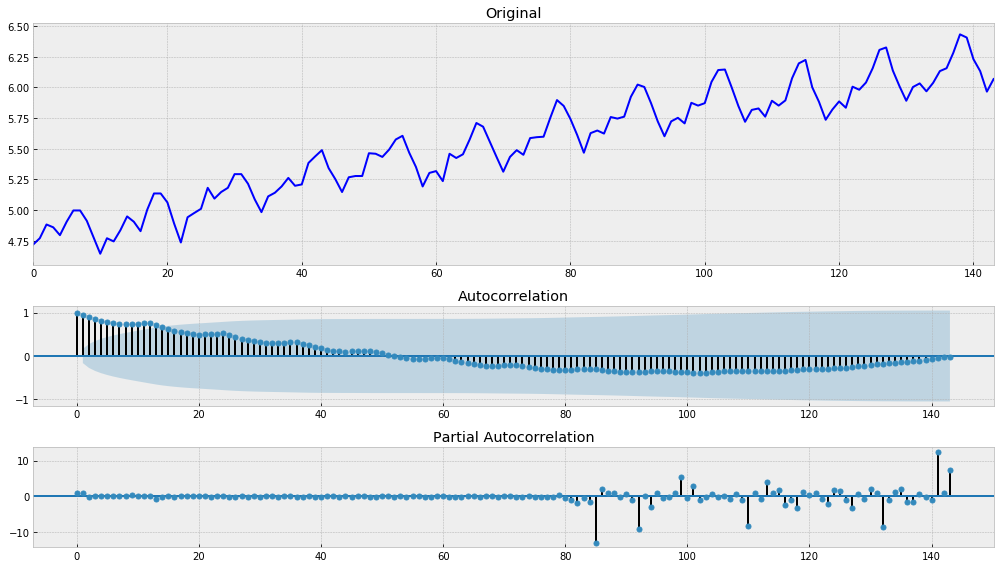

In [21]:
tsplot(series)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [26]:
4.77068462 - 4.71849887

0.05218574999999959

In [23]:
series

array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
       4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
       4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989,
       4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
       5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
       5.01063529, 5.18178355, 5.0937502 , 5.14749448, 5.18178355,
       5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
       5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
       5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425,
       5.25227343, 5.14749448, 5.26785816, 5.27811466, 5.27811466,
       5.46383181, 5.45958551, 5.433722  , 5.49306144, 5.5759491 ,
       5.60580207, 5.46806014, 5.35185813, 5.19295685, 5.30330491,
       5.31811999, 5.23644196, 5.45958551, 5.42495002, 5.45532112,
       5.5759491 , 5.71042702, 5.68017261, 5.55682806, 5.433722  ,
       5.31320598, 5.433722  , 5.48893773, 5.45103845, 5.58724

In [24]:
series = series[1:] - series[:-1]

In [25]:
series

array([ 0.05218575,  0.1121173 , -0.02298952, -0.06402186,  0.10948423,
        0.0919375 ,  0.        , -0.08455739, -0.13353139, -0.13473259,
        0.12629373, -0.0257525 ,  0.09134978,  0.11247798, -0.04348511,
       -0.07696104,  0.17563257,  0.13185213,  0.        , -0.0732034 ,
       -0.1722459 , -0.15415068,  0.20544397,  0.03509132,  0.03390155,
        0.17114826, -0.08803335,  0.05374428,  0.03428907,  0.11152127,
        0.        , -0.07836907, -0.12733942, -0.10398971,  0.12838117,
        0.02967577,  0.05129329,  0.06973334, -0.06419316,  0.01098912,
        0.17500891,  0.05358425,  0.05085842, -0.14660347, -0.09006082,
       -0.10477895,  0.12036368,  0.0102565 ,  0.        ,  0.18571715,
       -0.00424629, -0.02586351,  0.05933944,  0.08288766,  0.02985296,
       -0.13774193, -0.11620201, -0.15890128,  0.11034806,  0.01481509,
       -0.08167803,  0.22314355, -0.0346355 ,  0.0303711 ,  0.12062799,
        0.13447791, -0.03025441, -0.12334455, -0.12310606, -0.12

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


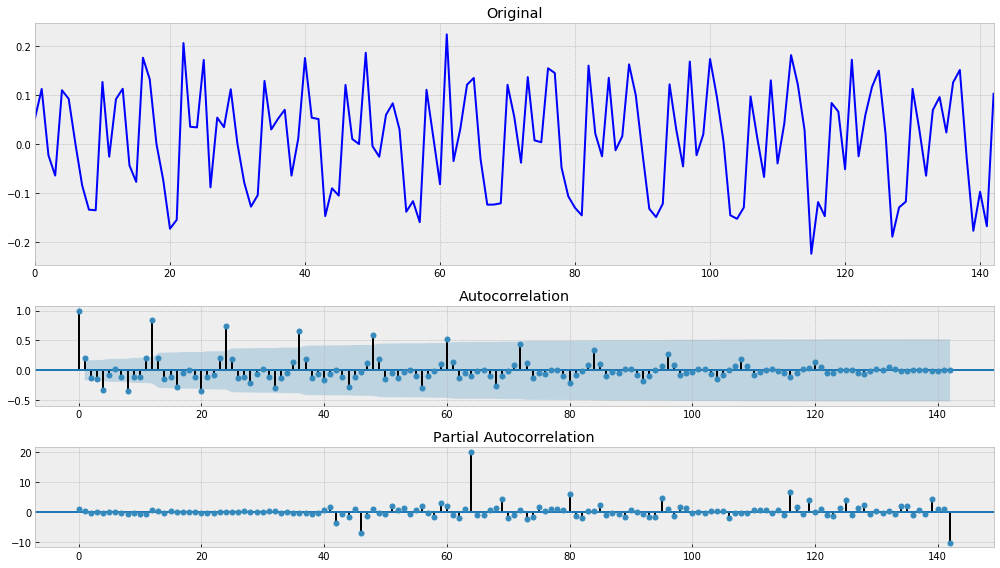

In [9]:
tsplot(series)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [10]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


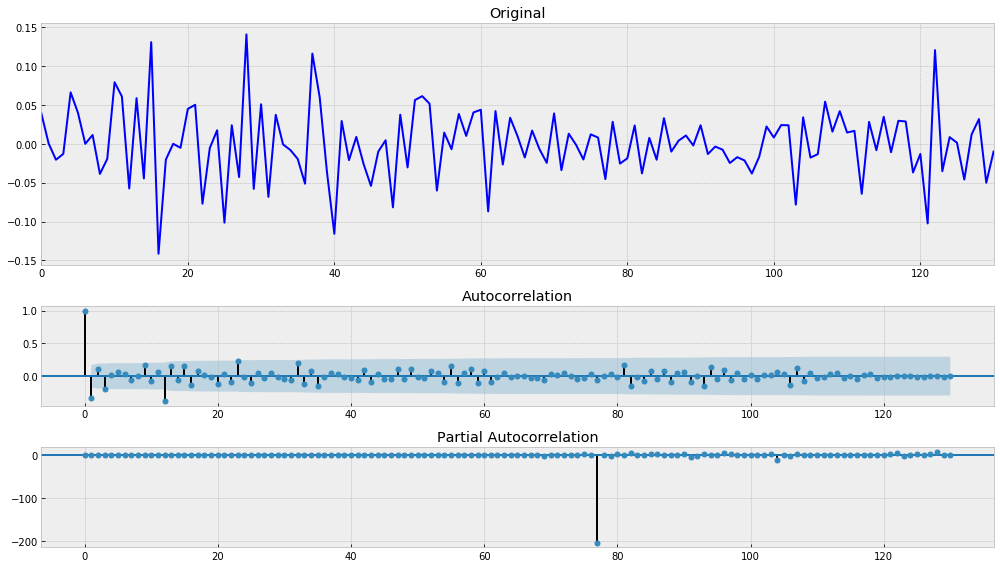

In [11]:
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!